# A Data-Driven Study on Social Media Usage and its Effects on Users

## Introduction

In this study, I will use a dataset found publicly on Kaggle to analyze data concerning social media and its effect on productivity, burnout, and stress.

The first step of this study is to perform a general Exploratory Data Analysis (EDA) of the dataset. Specific areas of interest, derived from glancing over the data provided, include:

1. Understanding how social media usage and burnout are related.
2. Understanding how social media usage and changes in stress levels are related.
3. Understanding how social media usage and changes in productivity are related.
4. Understanding how social media usage before bed affects sleep quality.
5. Understanding which age groups are more prone to the effects of social media.
6. Understanding which gender is more prone to the effects of social media.
7. Understanding which social media platforms impact users the most.

Based on the insights from the analysis, I will determine which points are relevant to the creation of a machine learning model that predicts user outcomes and behaviors associated with social media usage.

The dataset used for this study can be found publicly on Kaggle.com at (https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity?resource=download)

## Understanding the Dataset

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("social_media_vs_productivity.csv")
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


As specified by the author of the data, the following columns exist in the dataset:

age:	Age of the individual (18–65 years)

gender: 	Gender identity: Male, Female, or Other

job_type: 	Employment sector or status (IT, Education, Student, etc.)

daily_social_media_time: 	Average daily time spent on social media (hours)

social_platform_preference: 	Most-used social platform (Instagram, TikTok, Telegram, etc.)

number_of_notifications: 	Number of mobile/social notifications per day

work_hours_per_day: 	Average hours worked each day

perceived_productivity_score: 	Self-rated productivity score (scale: 0–10)

actual_productivity_score: 	Simulated ground-truth productivity score (scale: 0–10)

stress_level: 	Current stress level (scale: 1–10)

sleep_hours: 	Average hours of sleep per night

screen_time_before_sleep: 	Time spent on screens before sleeping (hours)

breaks_during_work: 	Number of breaks taken during work hours

uses_focus_apps: 	Whether the user uses digital focus apps (True/False)

has_digital_wellbeing_enabled: 	Whether Digital Wellbeing is activated (True/False)

coffee_consumption_per_day: 	Number of coffee cups consumed per day

days_feeling_burnout_per_month: 	Number of burnout days reported per month

weekly_offline_hours: 	Total hours spent offline each week (excluding sleep)

job_satisfaction_score: 	Satisfaction with job/life responsibilities (scale: 0–10)

Two points should be further explained:
1. "Digital Wellbeing" refers to to a feature of smartphones that allows users to monitor phone usage.
2. "Digital focus apps" allow users to block distractions caused by smartphones.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17074 entries, 0 to 29998
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             17074 non-null  int64  
 1   gender                          17074 non-null  object 
 2   job_type                        17074 non-null  object 
 3   daily_social_media_time         17074 non-null  float64
 4   social_platform_preference      17074 non-null  object 
 5   number_of_notifications         17074 non-null  int64  
 6   work_hours_per_day              17074 non-null  float64
 7   perceived_productivity_score    17074 non-null  float64
 8   actual_productivity_score       17074 non-null  float64
 9   stress_level                    17074 non-null  float64
 10  sleep_hours                     17074 non-null  float64
 11  screen_time_before_sleep        17074 non-null  float64
 12  breaks_during_work              17074

In [75]:
df.shape

(17074, 19)

In [76]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000,17074.000000
mean,41.462926,3.122575,59.974288,6.989854,5.505500,4.944523,5.512592,6.506392,1.025150,5.001113,2.004803,15.540119,10.369954,4.945862
std,13.835084,2.080244,7.788587,1.995284,2.026431,1.888851,2.866152,1.455514,0.654824,3.183056,1.409725,9.240403,7.253482,2.130118
min,18.000000,0.000000,32.000000,0.000000,2.000000,0.300000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.650000,55.000000,5.660000,3.750000,3.350000,3.000000,5.500000,0.530000,2.000000,1.000000,8.000000,4.610000,3.320000
50%,41.000000,3.040000,60.000000,6.990000,5.520000,4.940000,6.000000,6.510000,1.010000,5.000000,2.000000,16.000000,10.010000,4.940000
75%,53.000000,4.370000,65.000000,8.350000,7.260000,6.530000,8.000000,7.490000,1.470000,8.000000,3.000000,24.000000,15.310000,6.580000
max,65.000000,17.820000,90.000000,12.000000,9.000000,9.850000,10.000000,10.000000,3.000000,10.000000,9.000000,31.000000,40.960000,10.000000


In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df['social_platform_preference'].unique()

array(['Facebook', 'Twitter', 'TikTok', 'Telegram', 'Instagram'],
      dtype=object)

In [79]:
df['job_type'].unique()

array(['Unemployed', 'Health', 'Education', 'IT', 'Student', 'Finance'],
      dtype=object)

Some initial observations:

1. The data contains a mix of boolean, float, integer, and string values.
2. The data (initially) contains 30000 rows and 19 columns.
3. The data contains no duplicates.
4. Certain columns are missing data values. These include: "daily_social_media_time", "perceived_productivity_score", "actual_productivity_score", "stress_level", "sleep_hours", "screen_time_before_sleep", "job_satisfaction_score".
5. The data covers Facebook, Twitter, TikTok, Telegram, and Instagram as the social media apps used by the users.
6. The data covers users who are Unemployed, Students, and professionals in the Health, Education, IT, and Finance sectors.

------------------------------------------------------------

## Data Preprocessing

It is necessary to clear any NaN (null) values.

In [82]:
df.dropna(inplace=True)

In [83]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.18,Facebook,61,6.75,8.04,7.29,4.0,5.12,0.42,8,False,False,4,11,21.93,6.34
1,46,Male,Health,3.25,Twitter,59,9.17,5.06,5.17,7.0,5.10,0.67,7,True,True,2,25,0.00,3.41
6,56,Female,Unemployed,4.38,TikTok,60,3.90,6.42,5.98,7.0,7.55,2.25,4,False,False,4,20,24.08,5.50
7,36,Female,Education,4.09,Twitter,49,6.56,2.68,2.45,4.0,6.33,0.75,2,False,False,4,29,8.42,3.44
10,28,Male,IT,3.34,Twitter,57,11.02,8.94,7.98,4.0,3.95,1.03,5,True,True,1,3,13.51,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,34,Male,IT,3.56,Twitter,59,7.69,3.23,2.93,9.0,5.69,2.33,2,False,False,1,30,3.69,2.12
29992,44,Female,Unemployed,1.65,TikTok,39,6.55,5.90,5.16,9.0,8.80,0.31,9,True,False,2,1,24.74,6.07
29996,39,Male,Health,4.44,Instagram,46,4.69,8.13,6.66,8.0,3.05,0.15,3,False,False,1,29,4.11,6.16
29997,42,Male,Education,17.72,TikTok,64,10.92,8.61,8.66,5.0,5.49,1.22,10,False,False,1,2,1.89,6.29


Nearly 13000 rows contained missing data and were therefore dropped.

Rounding the decimal values to two decimal places will make the data easier to read and interpret, as exact values are not needed in these cases.

In [85]:
columns_to_round = [
    'daily_social_media_time', 
    'work_hours_per_day',
    'perceived_productivity_score', 
    'actual_productivity_score', 
    'sleep_hours', 
    'screen_time_before_sleep', 
    'weekly_offline_hours', 
    'job_satisfaction_score'
]

df[columns_to_round] = df[columns_to_round].round(2)

In [86]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.18,Facebook,61,6.75,8.04,7.29,4.0,5.12,0.42,8,False,False,4,11,21.93,6.34
1,46,Male,Health,3.25,Twitter,59,9.17,5.06,5.17,7.0,5.10,0.67,7,True,True,2,25,0.00,3.41
6,56,Female,Unemployed,4.38,TikTok,60,3.90,6.42,5.98,7.0,7.55,2.25,4,False,False,4,20,24.08,5.50
7,36,Female,Education,4.09,Twitter,49,6.56,2.68,2.45,4.0,6.33,0.75,2,False,False,4,29,8.42,3.44
10,28,Male,IT,3.34,Twitter,57,11.02,8.94,7.98,4.0,3.95,1.03,5,True,True,1,3,13.51,9.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,34,Male,IT,3.56,Twitter,59,7.69,3.23,2.93,9.0,5.69,2.33,2,False,False,1,30,3.69,2.12
29992,44,Female,Unemployed,1.65,TikTok,39,6.55,5.90,5.16,9.0,8.80,0.31,9,True,False,2,1,24.74,6.07
29996,39,Male,Health,4.44,Instagram,46,4.69,8.13,6.66,8.0,3.05,0.15,3,False,False,1,29,4.11,6.16
29997,42,Male,Education,17.72,TikTok,64,10.92,8.61,8.66,5.0,5.49,1.22,10,False,False,1,2,1.89,6.29


The data now seems clean and is ready for analysis.

------------------------------------------------------------

## Exploratory Data Analysis (EDA)

It is important to analyse the data in order to find patterns, trends, relationships and meaning from it to provide a deeper understanding and also fuel informed decision-making.

A brief understanding of how much each social media platform is being used could provide some good initial information

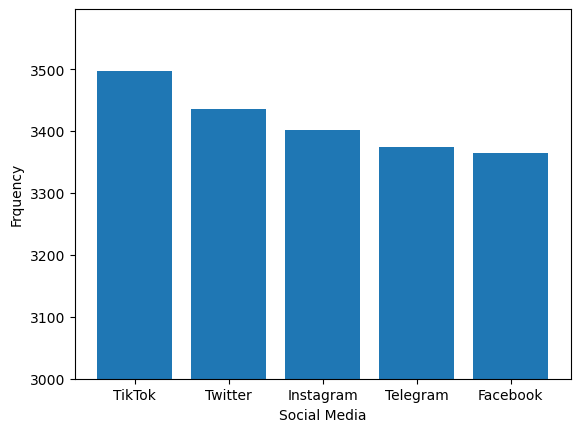

In [139]:
# Plot bar chart
social_media = df['social_platform_preference'].value_counts()
plt.bar(social_media.index, social_media.values)
plt.ylim(3000, social_media.max() + 100)
plt.xlabel("Social Media")
plt.ylabel("Frquency")

plt.show()

So TikTok is the most used social media in the dataset and Facebook is the least used.


The most logical question that follows is: how long are users spending on each of these platforms?

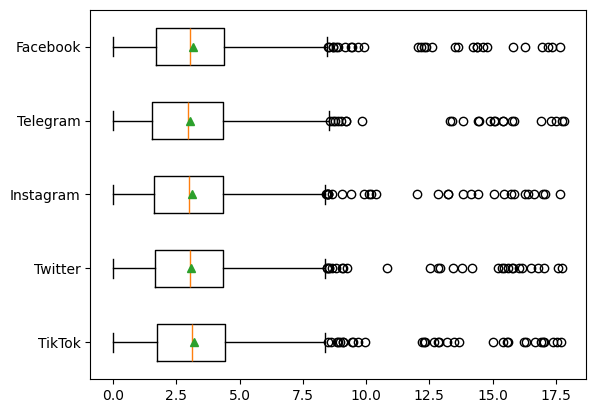

In [136]:
# Loop through all platforms to get list of dfs of each platform
platforms = ['TikTok', 'Twitter', 'Instagram', 'Telegram', 'Facebook']
time_df = [df[df['social_platform_preference'] == platform]['daily_social_media_time'] for platform in platforms]

# Plot boxplot
plt.boxplot(x=time_df, labels=["TikTok", "Twitter", "Instagram", "Telegram", "Facebook"], vert=False, showmeans=True)
plt.show()

The median (and also the mean) time for all platforms seems to be close to 3 hours per day, with 50% of users spending anywhere between roughly 2 and 5 hours on these platforms daily. What is even more interesting is the number of outliers we have. Many users seem to be spending between 8 and 18 hours a day on these apps!